In [942]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [943]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('SalesAll2019.csv', parse_dates=['Order Date'], dayfirst=True)
# Loại bỏ các cột không cần thiết
columns_to_drop = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Purchase Address','City']
data.drop(columns=columns_to_drop, inplace=True)
# Chuyển đổi cột 'Order Date' thành kiểu datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Tính tổng tiền bán của mỗi ngày
daily_sales = data.groupby(data['Order Date'].dt.date)['Total Price'].sum().reset_index()

# Đổi tên cột 'Order Date' thành 'date' 
daily_sales.rename(columns={'Order Date': 'date'}, inplace=True)
# Sắp xếp lại dữ liệu theo 'Order Date'
daily_sales.sort_values(by='date', inplace=True)
daily_sales['date']=pd.to_datetime(daily_sales['date'])
daily_sales.drop(daily_sales.tail(1).index, inplace=True)

print(daily_sales)

          date  Total Price
0   2019-01-01     65681.94
1   2019-01-02     70813.20
2   2019-01-03     47046.20
3   2019-01-04     62012.21
4   2019-01-05     46524.63
..         ...          ...
360 2019-12-27    126628.05
361 2019-12-28    134015.50
362 2019-12-29    156024.62
363 2019-12-30    152319.81
364 2019-12-31    131454.30

[365 rows x 2 columns]


In [944]:
#tính tiền bán theo tháng
daily_sales['date']=daily_sales['date']
m_sales = daily_sales
m_sales.info()
#m_sales['date']=m_sales['date'].dt.to_timestamp()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[ns]
 1   Total Price  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


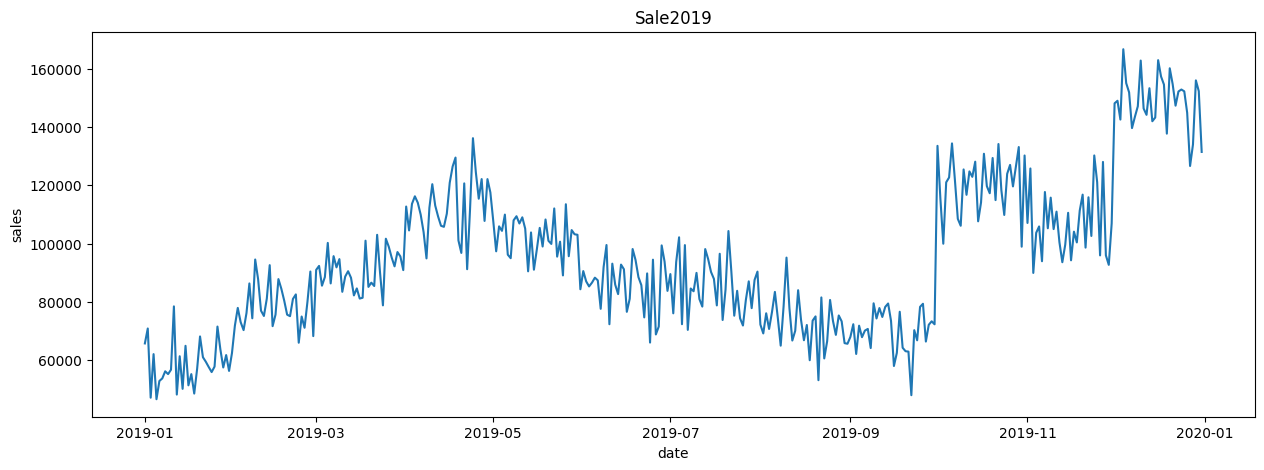

In [945]:
plt.figure(figsize=(15,5))
plt.plot(m_sales['date'],m_sales['Total Price'])
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Sale2019")
plt.show()

In [946]:
#thêm cột sale_diff
m_sales['sale_diff']=m_sales['Total Price'].diff()
m_sales=m_sales.dropna()
m_sales.head(12)

,date,Total Price,sale_diff
1,2019-01-02,70813.20,5131.26
2,2019-01-03,47046.20,-23767.00
3,2019-01-04,62012.21,14966.01
4,2019-01-05,46524.63,-15487.58
5,2019-01-06,52777.49,6252.86
6,2019-01-07,53676.42,898.93
7,2019-01-08,56112.47,2436.05
8,2019-01-09,55153.13,-959.34
9,2019-01-10,56660.92,1507.79
10,2019-01-11,78414.54,21753.62


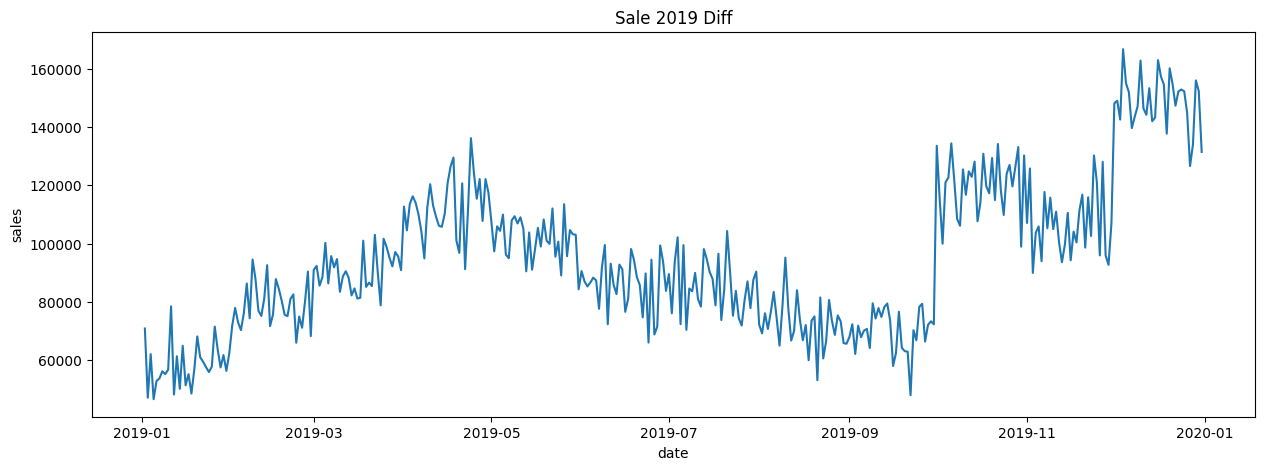

In [947]:
plt.figure(figsize=(15,5))
plt.plot(m_sales['date'],m_sales['Total Price'])
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Sale 2019 Diff")
plt.show()

In [948]:
supervised_data=m_sales.drop(['date','Total Price'],axis=1)
for i in range(1,61):
    col_name='D_'+str(i)
    supervised_data[col_name]=supervised_data['sale_diff'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)
supervised_data.head()    

,sale_diff,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60
0,-6790.92,1365.79,22743.50,-22177.21,10370.81,8945.66,-3873.76,9009.11,-16595.19,1551.68,...,21753.62,1507.79,-959.34,2436.05,898.93,6252.86,-15487.58,14966.01,-23767.00,5131.26
1,2966.43,-6790.92,1365.79,22743.50,-22177.21,10370.81,8945.66,-3873.76,9009.11,-16595.19,...,-30288.13,21753.62,1507.79,-959.34,2436.05,898.93,6252.86,-15487.58,14966.01,-23767.00
2,11724.23,2966.43,-6790.92,1365.79,22743.50,-22177.21,10370.81,8945.66,-3873.76,9009.11,...,13157.98,-30288.13,21753.62,1507.79,-959.34,2436.05,898.93,6252.86,-15487.58,14966.01
3,-13913.37,11724.23,2966.43,-6790.92,1365.79,22743.50,-22177.21,10370.81,8945.66,-3873.76,...,-11193.91,13157.98,-30288.13,21753.62,1507.79,-959.34,2436.05,898.93,6252.86,-15487.58
4,9368.68,-13913.37,11724.23,2966.43,-6790.92,1365.79,22743.50,-22177.21,10370.81,8945.66,...,14778.84,-11193.91,13157.98,-30288.13,21753.62,1507.79,-959.34,2436.05,898.93,6252.86


In [949]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data=supervised_data[:-60]
test_data=supervised_data[-60:]
print(train_data.shape)
print(test_data.shape)

(244, 61)
(60, 61)


In [950]:
# Chuẩn hóa dữ liệu sử dụng MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [951]:
# Chia dữ liệu thành đầu vào và đầu ra 
x_train,y_train=train_data[:,1:],train_data[:,0:1]
x_test,y_test=test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(244, 60)
(244,)
(60, 60)
(60,)


In [952]:
# Tạo DataFrame để lưu trữ dự đoán
sales_date=m_sales['date'][-60:].reset_index(drop=True)
predict_df=pd.DataFrame(sales_date)

In [953]:
#lấy giá trị thực tế
act_sales=m_sales['Total Price'][-61:].to_list()
print(act_sales)

[107058.9, 125772.34, 89898.24, 103673.17, 105864.68000000001, 93916.89, 117692.05, 105236.88, 115754.83, 104955.4, 110945.82, 100467.22, 93579.46, 99578.47, 110547.06, 94234.47, 104077.54, 100369.25, 111336.53, 116783.61, 98591.99, 115879.28, 102594.45, 130244.5, 121062.75, 95920.67, 128022.25, 95941.37, 92666.45, 106936.68000000001, 148153.63, 149025.71, 142570.45, 166727.69, 155079.3, 151910.47, 139645.75, 143527.63, 147135.13, 162832.74, 146367.03, 144195.15, 153332.14, 141991.78, 143269.72, 162970.61, 157364.72, 154598.77, 137732.67, 160181.3, 154756.87, 147348.09, 152214.45, 152888.82, 152268.42, 144912.02, 126628.05, 134015.5, 156024.62, 152319.81, 131454.3]


In [954]:
# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)   # Huấn luyện mô hình trên tập huấn luyện
lr_pre = lr_model.predict(x_test)   # Dự đoán trên tập kiểm tra

In [955]:
#Đảo ngược quá trình chuẩn hóa để trả về các giá trị gốc của dự đoán và dữ liệu kiểm tra
lr_pre=lr_pre.reshape(-1,1)
lr_pre_test_set=np.concatenate([lr_pre,x_test],axis=1)
lr_pre_test_set=scaler.inverse_transform(lr_pre_test_set)

In [956]:
result_list=[]
for index in range(0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0]+act_sales[index])
lr_pre_series=pd.Series(result_list,name="Linear Prediction")
predict_df=predict_df.merge(lr_pre_series,left_index=True,right_index=True) 
   

In [957]:
#print(predict_df)
lr_mse=np.sqrt(mean_squared_error(predict_df['Linear Prediction'],m_sales['Total Price'][-60:]))
lr_mae=mean_squared_error(predict_df['Linear Prediction'],m_sales['Total Price'][-60:])
lr_r2=r2_score(predict_df['Linear Prediction'],m_sales['Total Price'][-60:])
print(lr_mse)
print(lr_mae)
print(lr_r2)

16460.639531503126
270952653.78608346
0.48996095908129866


In [958]:
print(predict_df)

         date  Linear Prediction
0  2019-11-02      116108.499212
1  2019-11-03      124150.145115
2  2019-11-04      105556.359609
3  2019-11-05      122471.655622
4  2019-11-06      100016.986777
5  2019-11-07       98871.952427
6  2019-11-08       99063.413233
7  2019-11-09       99403.267107
8  2019-11-10      105657.861498
9  2019-11-11       94804.126342
10 2019-11-12      106484.457879
11 2019-11-13      106822.296920
12 2019-11-14       89958.033032
13 2019-11-15       98505.398722
14 2019-11-16      100469.476718
15 2019-11-17       97168.842978
16 2019-11-18      102870.256087
17 2019-11-19       90241.868265
18 2019-11-20      100145.581326
19 2019-11-21      115215.867362
20 2019-11-22      102761.045701
21 2019-11-23      124301.437193
22 2019-11-24       97639.736911
23 2019-11-25      131448.407321
24 2019-11-26      126178.865381
25 2019-11-27      118753.021391
26 2019-11-28      128899.414969
27 2019-11-29      103535.884964
28 2019-11-30      111296.729737
29 2019-12

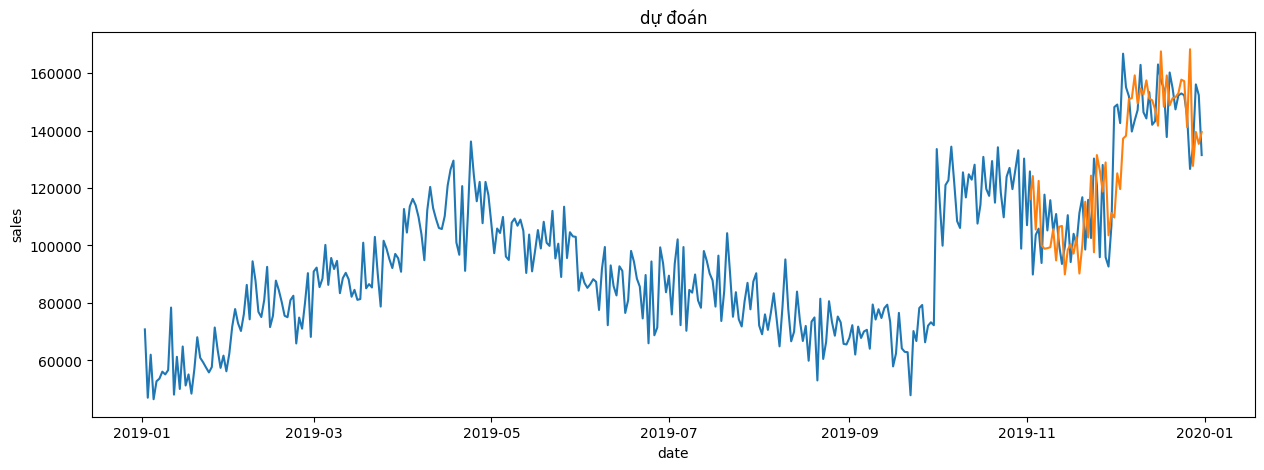

In [959]:
plt.figure(figsize=(15,5))
plt.plot(m_sales['date'],m_sales['Total Price'])
plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.xlabel("date")
plt.ylabel("sales")
plt.legend()
plt.title("dự đoán")
plt.show()

d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  w

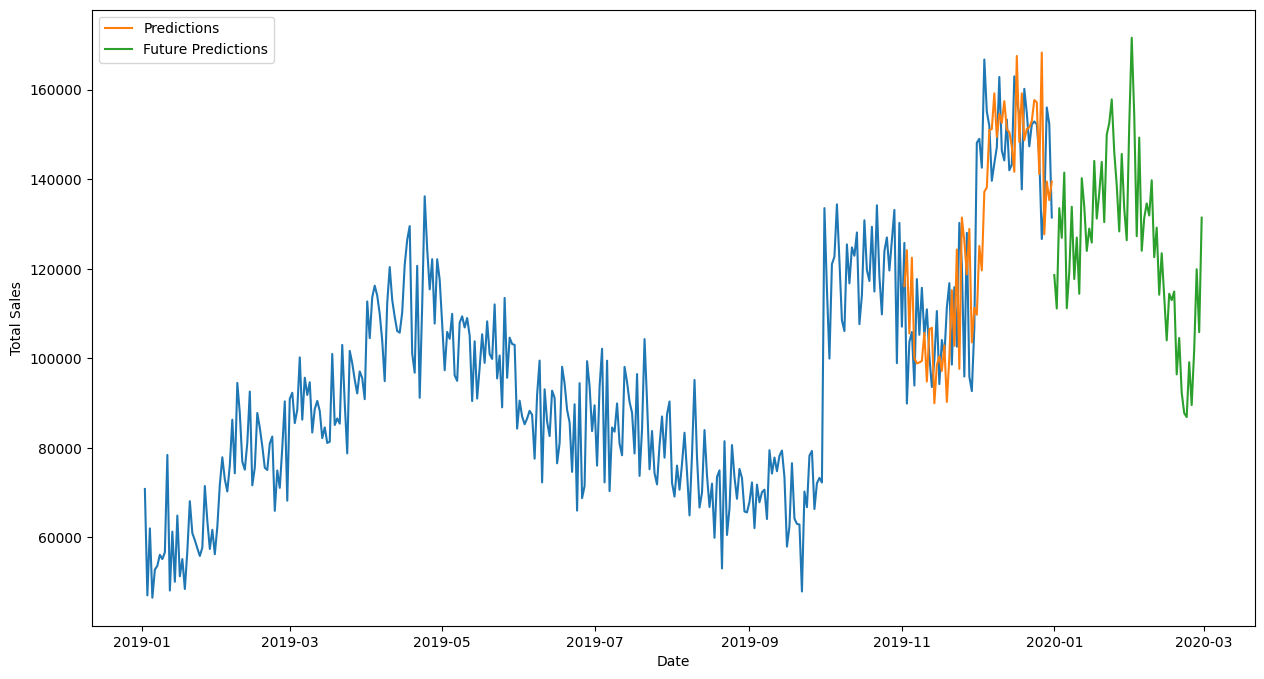

         date  Future Predictions
0  2020-01-01       118587.850025
1  2020-01-02       111123.668265
2  2020-01-03       133538.951612
3  2020-01-04       126889.612293
4  2020-01-05       141467.333254
5  2020-01-06       111170.901081
6  2020-01-07       119323.685371
7  2020-01-08       133841.033502
8  2020-01-09       117701.053104
9  2020-01-10       126971.177005
10 2020-01-11       114407.077756
11 2020-01-12       140219.852100
12 2020-01-13       133944.863294
13 2020-01-14       123975.782519
14 2020-01-15       128968.760142
15 2020-01-16       125833.399491
16 2020-01-17       144083.561884
17 2020-01-18       131200.478022
18 2020-01-19       136887.448160
19 2020-01-20       143856.545577
20 2020-01-21       130421.395439
21 2020-01-22       149964.718688
22 2020-01-23       152496.009508
23 2020-01-24       157824.085416
24 2020-01-25       146130.483764
25 2020-01-26       138639.763408
26 2020-01-27       128337.616019
27 2020-01-28       145646.198833
28 2020-01-29 

In [960]:
future_predictions = []
last_known_data = supervised_data.tail(1).values

for _ in range(60):
    scaled_data = scaler.transform(last_known_data)
    x_future = scaled_data[:, 1:]
    y_future_pred = lr_model.predict(x_future)
    y_future_pred_scaled = np.concatenate([y_future_pred.reshape(-1, 1), x_future], axis=1)
    y_future_pred_original = scaler.inverse_transform(y_future_pred_scaled)[0][0]
    future_predictions.append(y_future_pred_original + act_sales[-1])
    
    # Cập nhật last_known_data để sử dụng dự đoán này cho lần tiếp theo
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, 0] = y_future_pred_original

# Thêm dự đoán vào DataFrame
future_dates = pd.date_range(start=predict_df['date'].iloc[-1], periods=61, inclusive='right')
future_df = pd.DataFrame({'date': future_dates, 'Future Predictions': future_predictions})

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
plt.plot(m_sales['date'],m_sales['Total Price'])
plt.plot(predict_df['date'], predict_df['Linear Prediction'], label='Predictions')
plt.plot(future_df['date'], future_df['Future Predictions'], label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

print(future_df)
